### Gradient Descent

In [195]:
# definefunction my_grad
# compute the gradient of w numerically and find the minimum
# using definition of derivative
# set eps=0.0000001

import numpy as np
import matplotlib.pyplot as plt

eps=0.0000001

def my_grad(w,step):

    for cnt in range(10000):
        fw=(w[0]**2+w[1]-11)**2+(w[0]+w[1]**2-7)**2
        fw1=((((w[0]+eps)**2+w[1]-11)**2+((w[0]+eps)+w[1]**2-7)**2)-((w[0]**2+w[1]-11)**2+(w[0]+w[1]**2-7)**2))/eps
        fw2=(((w[0]**2+(w[1]+eps)-11)**2+(w[0]+(w[1]+eps)**2-7)**2)-((w[0]**2+w[1]-11)**2+(w[0]+w[1]**2-7)**2))/eps
        grad=[fw1,fw2]
        
        w[0]=w[0]-step*grad[0]
        w[1]=w[1]-step*grad[1]
        
        if np.sqrt(grad[0]**2+grad[1]**2)<10e-12:
            print("f(w)=",fw,"\nBreak in step ",cnt+1,"\nw=",w,"\ngradient(f(w))=",grad)
            break;

#### 1.$w^0=[0 -4]^T$

In [196]:
#w=[0 -4],step=0.005

w=[0,-4]
step=0.005

my_grad(w,step)

f(w)= 3.537705910027209e-13 
Break in step  89 
w= [-3.7793103207692997, -3.28318606286284] 
gradient(f(w))= [3.7929619380721585e-12, 6.118508616840931e-12]


In [197]:
#w=[0 -4],step=0.01

w=[0,-4]
step=0.01

my_grad(w,step)

f(w)= 3.5377084716892816e-13 
Break in step  37 
w= [-3.7793103207693206, -3.283186062862881] 
gradient(f(w))= [1.2322937665305837e-12, 4.948313818705761e-12]


Convergence speed of gradient descent is a function of step size:
If the step size is too large,there will be a loop between two point on the both side of the minimum but can't reach it,so the convergence speed will be slow;if the step size is too small,it will be too slow to approach the minimum.There might be a best step size for each problem.

#### 2.step=0.01 for four different initializations $w^0$

In [198]:
#define function grad_and_plot
#find the minimum and generate a contour plot showing the path

def grad_and_plot(w,step):
    wpath=[[0 for i in range(2)] for j in range (10000)]
    wpath[0][0]=w[0]
    wpath[0][1]=w[1]
    for cnt in range(10000):
        fw=(w[0]**2+w[1]-11)**2+(w[0]+w[1]**2-7)**2
        fw1=((((w[0]+eps)**2+w[1]-11)**2+((w[0]+eps)+w[1]**2-7)**2)-((w[0]**2+w[1]-11)**2+(w[0]+w[1]**2-7)**2))/eps
        fw2=(((w[0]**2+(w[1]+eps)-11)**2+(w[0]+(w[1]+eps)**2-7)**2)-((w[0]**2+w[1]-11)**2+(w[0]+w[1]**2-7)**2))/eps
        grad=[fw1,fw2]
        
        w[0]=w[0]-step*grad[0]
        wpath[cnt+1][0]=w[0]
        
        w[1]=w[1]-step*grad[1]
        wpath[cnt+1][1]=w[1]
        
        if np.sqrt(grad[0]**2+grad[1]**2)<10e-12:
            print("f(w)=",fw,"\nBreak in step ",cnt+1,"\nw=",w,"\ngradient(f(w))=",grad)
            break;
    
    w1=np.linspace(-5,5,256)
    w2=np.linspace(-5,5,256)
    W1,W2=np.meshgrid(w1,w2)
    fw=(W1**2+W2-11)**2+(W1+W2**2-7)**2
    plt.contour(W1,W2,fw,100)
    for i in range(0,cnt+1):
        plt.scatter(wpath[i][0],wpath[i][1],color='r')
    plt.show()

f(w)= 3.5377084716892816e-13 
Break in step  37 
w= [-3.7793103207693206, -3.283186062862881] 
gradient(f(w))= [1.2322937665305837e-12, 4.948313818705761e-12]


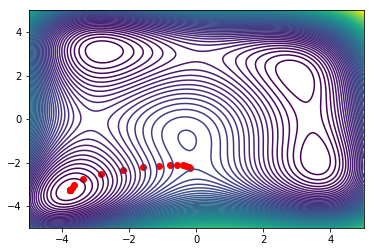

In [199]:
#w=[0 -4],step=0.01

w=[0,-4]
step=0.01

grad_and_plot(w,step)

Local minimum.

f(w)= 1.5267025707446985e-13 
Break in step  85 
w= [3.5844282928999425, -1.8481265657307786] 
gradient(f(w))= [-7.869635263694837e-13, 8.75173751600212e-12]


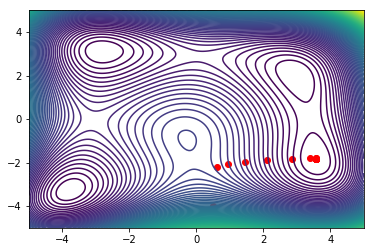

In [200]:
#w=[0.5 -4],step=0.01

w=[0.5,-4]
step=0.01

grad_and_plot(w,step)

Local minimum.

f(w)= 1.7853393288000842e-13 
Break in step  40 
w= [-2.8051181359642166, 3.1313124690455516] 
gradient(f(w))= [7.8794876587931e-12, -6.564855408660483e-13]


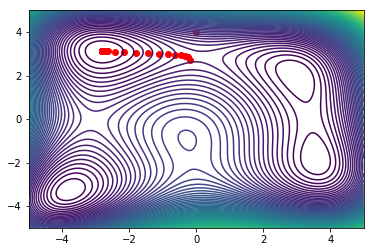

In [201]:
#w=[0 4],step=0.01

w=[0,4]
step=0.01

grad_and_plot(w,step)

Local minimum.

f(w)= 1.0106799925011118e-13 
Break in step  104 
w= [2.9999999566161564, 1.9999999755200901] 
gradient(f(w))= [-3.4813118496890723e-12, 8.392011859170576e-12]


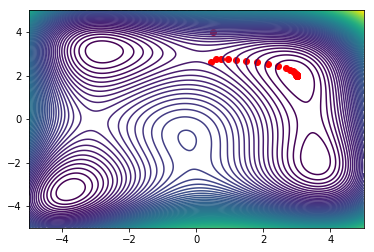

In [203]:
#w=[0.5 4],step=0.01

w=[0.5,4]
step=0.01

grad_and_plot(w,step)

Global minimum.

### Parameter Estimation

In [253]:
from scipy.stats import multivariate_normal

def generate_sample(n):
    mean=np.array([-1,0,4,1,0.5])
    cov=2*np.array(np.identity(5))
    rv=np.array([multivariate_normal.rvs(mean=mean,cov=cov) for i in range(n)])
    return rv

In [261]:
def estimate_mean(X,n):
    mean=[0 for i in range(5)]
    for i in range(5):
        sum=0
        for j in range(n):
            sum=sum+X[j][i]
        mean[i]=sum/n
    return mean

In [264]:
def error(mean):
    mu=[-1,0,4,1,0.5]
    sumsq=0
    for i in range(5):
        sumsq=sumsq+(mean[0]-mu[0])**2
    return np.sqrt(sumsq)

In [297]:
point=[[0 for i in range(5)]for j in range(2)]
point[0]=[100,1000,10000,100000,1000000]
for i in range(5):
    X=generate_sample(point[0][i])
    mean=estimate_mean(X,point[0][i])
    point[1][i]=error(mean)
print(point)

[[100, 1000, 10000, 100000, 1000000], [0.8405019150505522, 0.04325236728372745, 0.03522628074665515, 0.00914959480311854, 0.0025561883017803646]]


In [299]:
from math import log10

point_log=[[0 for i in range(5)] for j in range(2)]
for i in range(2):
    for j in range(5):
        point_log[i][j]=log10(point[i][j])
point_log

[[2.0, 3.0, 4.0, 5.0, 6.0],
 [-0.07546129270048894,
  -1.3639901177916631,
  -1.453133207981744,
  -2.0385981385746703,
  -2.5924071570034792]]

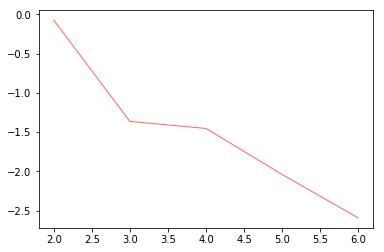

In [306]:
plt.plot(point_log[0],point_log[1], color='r', linewidth=1, alpha=0.6)

Relation ship between $e_N$ and N:The larger N,the smaller $e_N$.